In [1]:
#### import some functionality
from datetime import datetime

import os
import pip
os.system('python -m pip install numpy')
os.system('python -m pip install matplotlib')
os.system('python -m pip install scipy')
os.system('python -m pip install panda')
os.system('python -m pip install nilearn')
os.system('python -m pip install sklearn')
os.system('python -m pip install pickle')
os.system('python -m pip install atlasreader')
os.system('python -m pip install seaborn')

#import os.path as op
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from first_level import FirstLevelModel
from sklearn.model_selection import train_test_split
#from scipy.ndimage import gaussian_filter

%matplotlib inline

  Created wheel for panda: filename=panda-0.3.1-py3-none-any.whl size=7256 sha256=41d9e66d4db2cf1606aade89abfc9320252076a8a022732682578e79f64dfe7a
  Stored in directory: /home/ucloud/.cache/pip/wheels/6c/5a/a9/a28c87238ddcc61701224f538bedccc21c9e2b8bc6fa8fca0e
Successfully built panda
  Created wheel for sklearn: filename=sklearn-0.0.post5-py3-none-any.whl size=2360 sha256=9a07972f3dc0f7f4748e766f9290d3a1b0aa38bad5592bb56c026b017ad90a6c
  Stored in directory: /home/ucloud/.cache/pip/wheels/36/49/c9/2374f1dee1b599effabf63d948635e6608f62d0ccde027b7e2
Successfully built sklearn


ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


  Created wheel for atlasreader: filename=atlasreader-0.1.2-py3-none-any.whl size=12046471 sha256=aa6af4b701df521341a2330ccc13efbb15e0ca1cdbeeaf459778014cf7fd2542
  Stored in directory: /home/ucloud/.cache/pip/wheels/87/0b/8b/83185241c4f15a023385b9f8e0821838b1ee56ffa733bdad6c
Successfully built atlasreader
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.1
    Uninstalling scipy-1.7.1:
      Successfully uninstalled scipy-1.7.1
  Attempting uninstall: pillow
    Found existing installation: Pillow 8.3.1
    Uninstalling Pillow-8.3.1:
      Successfully uninstalled Pillow-8.3.1


In [ ]:
#importing first level models

In [2]:
import pickle

# Getting the first level models from tutorial 13:
f = open('/work/neuro_data/FL_models_img_neg_and_img_pos.pkl', 'rb')
models, models_run_imgs, models_events, models_confounds = pickle.load(f)
f.close()


In [4]:
print(len(models[0].zmap))
#print(z_maps[0].shape)
print(models)

12
[FirstLevelModel(slice_time_ref=0.5, subject_label='0097', t_r=1), FirstLevelModel(slice_time_ref=0.5, subject_label='0107', t_r=1), FirstLevelModel(slice_time_ref=0.5, subject_label='0101', t_r=1), FirstLevelModel(slice_time_ref=0.5, subject_label='0100', t_r=1), FirstLevelModel(slice_time_ref=0.5, subject_label='0098', t_r=1), FirstLevelModel(slice_time_ref=0.5, subject_label='0104', t_r=1), FirstLevelModel(slice_time_ref=0.5, subject_label='0106', t_r=1), FirstLevelModel(slice_time_ref=0.5, subject_label='0105', t_r=1), FirstLevelModel(slice_time_ref=0.5, subject_label='0103', t_r=1), FirstLevelModel(slice_time_ref=0.5, subject_label='0099', t_r=1)]


In [5]:
models[0].conditions

['image_pos',
 'image_neg',
 'image_pos',
 'image_neg',
 'image_pos',
 'image_neg',
 'image_pos',
 'image_neg',
 'image_pos',
 'image_neg',
 'image_pos',
 'image_neg']

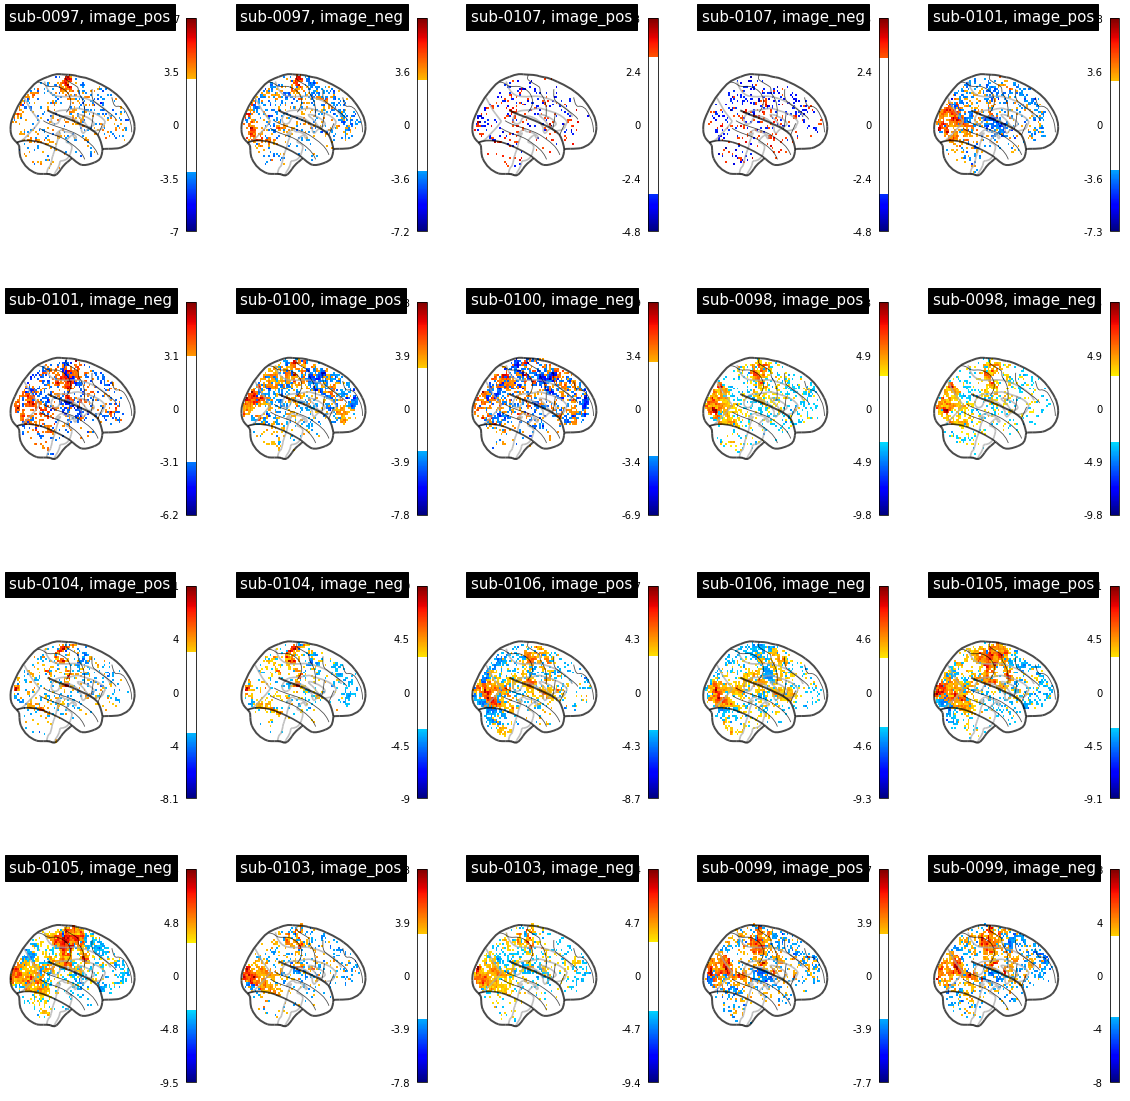

In [6]:
from nilearn import plotting
import matplotlib.pyplot as plt
from first_level import FirstLevelModel

from scipy.stats import norm
p001_unc = norm.isf(0.001)
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 20))


for i in range(len(models)):
    for ii in range(2):
        row = (i * 2 + ii) // 5  # Calculate the row index
        col = (i * 2 + ii) % 5  # Calculate the column index
        plotting.plot_glass_brain(models[i].zmap[ii], cmap='jet', colorbar=True, threshold=p001_unc,
                                  title=('sub-' + models[i].subject_label + ', ' + models[i].conditions[ii]),
                                  axes=axes[row, col],
                                  plot_abs=False, display_mode='x')

In [ ]:
#making a conditions list 
#this part is not needed now but don't want to delete it

In [16]:
conditions_label_all = np.empty((10, 0)).tolist()

for i in range(10):
    for ii in range(len(models_events1[i])):
        N = models_events1[i][ii].shape[0]

        for iii in range(N):
            # Make a variable with condition labels for use in later classification
            conditions_label_all[i].append(models_events1[i][ii]['trial_type'][iii])

In [ ]:
#reshaping

In [38]:
print(len(conditions_label_all[0]))

720


In [ ]:
#reshaping condtitions

In [46]:
conditions = []

for i in range(10):
    idx_neg = [int(ii) for ii in range(len(conditions_label_all[i])) if conditions_label_all[i][ii] == 'image_neg']
    idx_pos = [int(ii) for ii in range(len(conditions_label_all[i])) if conditions_label_all[i][ii] == 'image_pos']
    print("index done")
    
    # Concatenate trials
    idx = np.concatenate((idx_neg, idx_pos))
    print("concatenate done")
    
    conditions.append(np.array(conditions_label_all[i])[idx.astype(int)])

index done
concatenate done
index done
concatenate done
index done
concatenate done
index done
concatenate done
index done
concatenate done
index done
concatenate done
index done
concatenate done
index done
concatenate done
index done
concatenate done
index done
concatenate done


In [77]:
from nilearn.image import index_img, concat_imgs

N_par=10 #len(models_events1) # Number of participants
z_maps_img= np.empty((N_par, 0)).tolist()
z_maps_conc= np.empty((N_par, 0)).tolist()

for i in range(N_par):
    n_trials=len(conditions_label_all_combined[i])
    text = "Reshaping participant %d" % (i+1)
    print(text)

    # Reshaping data------------------------------
    
    

    range_z_maps = z_maps_all_combined[0:719]
    z_maps_conc[i]=concat_imgs(range_z_maps)
    print(z_maps_conc[i].shape)
    z_maps_img_all_combined[i] = index_img(z_maps_conc[i], idx.astype(int))
    print(z_maps_img_all_combined[i].shape)

NameError: name 'contact_imgs' is not defined

In [ ]:
#making test and tarining (doesn't work)

In [75]:
N_par = 10 #len(models_events1) # Number of participants
idx1= np.empty((N_par, 0)).tolist()
idx2= np.empty((N_par, 0)).tolist()
conditions1= np.empty((N_par, 0)).tolist()
conditions2= np.empty((N_par, 0)).tolist()
fmri_img1= np.empty((N_par, 0)).tolist()
fmri_img2= np.empty((N_par, 0)).tolist()

for i in range(N_par):
    text = "Creating trian/test data for participant %d\n" % (i+1)
    print(text)
    #idx2[i]=np.arange(models[i].conditions.shape[0])
    # create training and testing vars on the basis of class labels
    conditions1[i],  conditions2[i] = train_test_split(idx2[i],conditions[i], test_size=0.2)
    
    # Reshaping data------------------------------
    from nilearn.image import index_img
    fmri_img1[i] = index_img(z_maps[i], idx1[i])
    fmri_img2[i] = index_img(z_maps[i], idx2[i])

Creating trian/test data for participant 1



DimensionError: Input data has incompatible dimensionality: Expected dimension is 4D and you provided a 3D image. See https://nilearn.github.io/stable/manipulating_images/input_output.html.

In [108]:
from sklearn.model_selection import train_test_split

# Create empty lists to store the data for training and test sets
train_zmaps = []
train_conditions = []
train_sessions = []

test_zmaps = []
test_conditions = []
test_sessions = []

    
    
    # Split the data into training and test sets
zmaps_train, zmaps_test, conditions_train, conditions_test, sessions_train, sessions_test = train_test_split(
model.zmap, model.conditions, model.session, test_size=0.2, random_state=42
    
    # Add the training data to the training sets
train_zmaps.extend(zmaps_train)
train_conditions.extend(conditions_train)
train_sessions.extend(sessions_train)
    
    # Add the test data to the test sets
test_zmaps.extend(zmaps_test)
test_conditions.extend(conditions_test)
test_sessions.extend(sessions_test)

# Print the sizes of the training and test sets
print('Training set size:', len(train_zmaps))
print('Test set size:', len(test_zmaps))

SyntaxError: invalid syntax (396969095.py, line 19)

In [ ]:
















#Second level analysis now

In [ ]:
#making subset of the z-maps we want in the second level analysis

In [16]:
#just taking the first z_map for eac participant (z-map for session 1 condtion image_pos)
models_sub = []
for i in range(len(models)):
    for ii in range(2):
        models_sub.append(models[i].zmap[ii])

In [58]:
#print(len(models_sub_neg))
print(len(models_sub_pos))
models_sub_pos[0].zmap
#models[0].conditions

10


In [45]:
#making for image pos
models_sub_pos = []
for i in range(len(models)):
    models_sub_pos.append(models[i].zmap[0])
    models_sub_pos.append(models[i].zmap[2])
    models_sub_pos.append(models[i].zmap[4])
    models_sub_pos.append(models[i].zmap[6])
    models_sub_pos.append(models[i].zmap[8])
    models_sub_pos.append(models[i].zmap[10])
    
#making for image neg
models_sub_neg = []
for i in range(len(models)):
    models_sub_neg.append(models[i].zmap[1])

In [77]:
import copy

models_sub = []

for model in models:
    # Create a new model with selected z-maps
    model_sub = copy.deepcopy(model)
    model_sub.zmap = model.zmap[:2]  # Select the first two z-maps
    models_sub.append(model_sub)
    
#image pos
models_sub_pos = []
idx_pos = [0,2,4,6,8,10]
for model in models:
    # Create a new model with selected z-maps
    model_sub_pos = copy.deepcopy(model)
    model_sub_pos.zmap = [model.zmap[i] for i in idx_pos]  # Select the first two z-maps
    models_sub_pos.append(model_sub_pos)
    
    
#image neg
models_sub_neg = []
idx_neg = [1,3,5,7,9,11]
for model in models:
    # Create a new model with selected z-maps
    model_sub_neg = copy.deepcopy(model)
    model_sub_neg.zmap = [model.zmap[i] for i in idx_neg]  # Select the first two z-maps
    models_sub_neg.append(model_sub_neg)

In [78]:
import numpy as np

for model in models_sub:
    for i, zmap in enumerate(model.zmap):
        # Expand dimensions to create a 4D shape
        model.zmap[i] = np.expand_dims(zmap, axis=-1)
        
#for image pos
for model in models_sub_pos:
    for i, zmap in enumerate(model.zmap):
        # Expand dimensions to create a 4D shape
        model.zmap[i] = np.expand_dims(zmap, axis=-1)
        
#for image_neg
for model in models_sub_neg:
    for i, zmap in enumerate(model.zmap):
        # Expand dimensions to create a 4D shape
        model.zmap[i] = np.expand_dims(zmap, axis=-1)

In [80]:
#print(len(models[0].zmap))
#print(len(models_sub[0].zmap))
models_sub_neg[0].zmap

[array([<nibabel.nifti1.Nifti1Image object at 0x7f4f331c72b0>],
       dtype=object),
 array([<nibabel.nifti1.Nifti1Image object at 0x7f4f331c75b0>],
       dtype=object),
 array([<nibabel.nifti1.Nifti1Image object at 0x7f4f331c78b0>],
       dtype=object),
 array([<nibabel.nifti1.Nifti1Image object at 0x7f4f331c7bb0>],
       dtype=object),
 array([<nibabel.nifti1.Nifti1Image object at 0x7f4f331c7eb0>],
       dtype=object),
 array([<nibabel.nifti1.Nifti1Image object at 0x7f4f331d21f0>],
       dtype=object)]

p_val = models[0].compute_contrast(first_level_contrast = 'image_neg', output_type='p_value')

In [ ]:
















#need this
#making the accual second level model: for participant, for the 6 sessions for two conditions

In [63]:
from nilearn.image import resample_to_img

# Reshape and resample images to have the same shape and affine
reference_img = models_subset[0].zmap[0]  # Use the first image as the reference
resampled_images = []
for model in models_subset:
    for zmap in model.zmap:
        # Resample the zmap to match the reference image's shape and affine
        resampled_zmap = resample_to_img(zmap, reference_img, interpolation='nearest')
        resampled_images.append(resampled_zmap)

# Convert the resampled images to a 4D array
second_level_input = resampled_images

NameError: name 'models_subset' is not defined

In [ ]:
#for image pos

In [91]:
#for image pos
from nilearn.image import resample_to_img

# Reshape and resample images to have the same shape and affine
reference_img = models_sub_pos[0].zmap[0]  # Use the first image as the reference
resampled_images = []
for model in models_sub_pos:
    for zmap in model.zmap:
        # Resample the zmap to match the reference image's shape and affine
        resampled_zmap = resample_to_img(zmap, reference_img, interpolation='nearest')
        resampled_images.append(resampled_zmap)

# Convert the resampled images to a 4D array
second_level_input = resampled_images

In [ ]:
#for image neg

In [82]:
#for image pos
from nilearn.image import resample_to_img

# Reshape and resample images to have the same shape and affine
reference_img = models_sub_neg[0].zmap[0]  # Use the first image as the reference
resampled_images = []
for model in models_sub_neg:
    for zmap in model.zmap:
        # Resample the zmap to match the reference image's shape and affine
        resampled_zmap = resample_to_img(zmap, reference_img, interpolation='nearest')
        resampled_images.append(resampled_zmap)

# Convert the resampled images to a 4D array
second_level_input = resampled_images

In [ ]:
#from here on input the condition wanted 

In [92]:
from nilearn.glm.second_level import SecondLevelModel

#second_level_input = models[0].zmap
#second_level_input = models_sub


design_matrix = pd.DataFrame(
    [1] * 60,
    columns=['intercept'],
)

#Adding the smoothing parameter
second_level_model = SecondLevelModel(smoothing_fwhm=8.0)
second_level_model = second_level_model.fit(second_level_input, design_matrix=design_matrix)
print(second_level_model)

#compute contrast 
zmap_g = second_level_model.compute_contrast(output_type='z_score')


SecondLevelModel(smoothing_fwhm=8.0)


In [ ]:
#plotting the z_map for the secon level analysis (so a generalized for consistent patterns in activation for participant one in comparison to eachother, altså image_pos compared to image_neg)

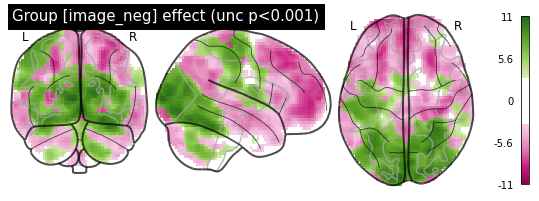

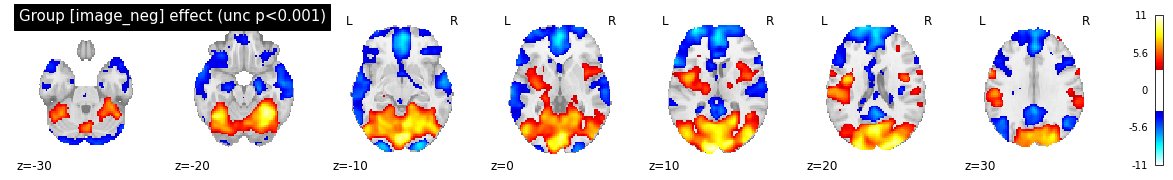

In [93]:
from nilearn.plotting import plot_stat_map
import matplotlib

plotting.plot_glass_brain(zmap_g, cmap='PiYG',colorbar=True, threshold=p001_unc,
                          title='Group [image_neg] effect (unc p<0.001)',
                          plot_abs=False)
plt.show()

plotting.plot_stat_map(zmap_g, cmap='cold_hot',threshold=p001_unc, cut_coords=[-30,-20,-10,0,10,20,30],
              display_mode='z',  black_bg=False,
              title='Group [image_neg] effect (unc p<0.001)')
plt.show()

In [ ]:
#correcting the p-values for multiple testing by taking the negative logarithm

In [94]:
import numpy as np
from nilearn.image import get_data, math_img

#Get an image of p-values 
p_val = second_level_model.compute_contrast(output_type='p_value')
# Get the number of voxels in the image
n_voxels = np.sum(get_data(second_level_model.masker_.mask_img_))
# Making an image with significant values, correcting the p-values for multiple testing and taking negative logarithm
neg_log_pval = math_img(
    '-np.log10(np.minimum(1, img * {}))'.format(str(n_voxels)),
    img=p_val,
)

#Check image shape
print(neg_log_pval.shape)

(78, 92, 65)


<string>:1: RuntimeWarning: divide by zero encountered in log10


In [ ]:
#kinda doing the same here as in the previous plotting, but now just displaying the raw betavalues

(78, 92, 65, 60)
(78, 92, 65)


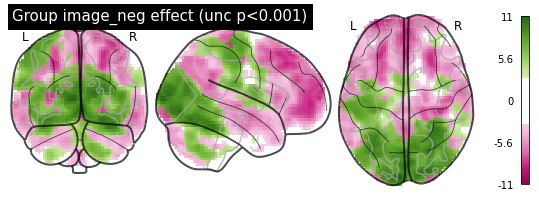

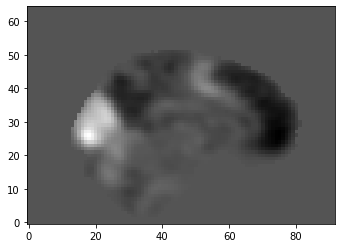

In [95]:
# Plot model.predicted (raw beta estimates) 
from nilearn import plotting 
from nilearn.image import get_data
import matplotlib.pyplot as plt

#Initialize second level model 
#Adding the smoothing parameter + minimize memory = False (to make it save the predicted values) 
second_level_model = SecondLevelModel(smoothing_fwhm=8.0, minimize_memory=False)

#Fitting second level model 
second_level_model = second_level_model.fit(second_level_input, design_matrix=design_matrix)
#print(second_level_model)

#compute contrast 
zmap_g = second_level_model.compute_contrast(output_type='z_score')
#print(zmap_g.shape)

#Extract predicted values (get one map of betas for each subject) 
predBeta = get_data(second_level_model.predicted)
print(predBeta.shape) 

map1 = predBeta[:,:,:,0]
print(map1.shape)

#Plot zmap
plotting.plot_glass_brain(zmap_g, cmap='PiYG',colorbar=True, threshold=p001_unc,
                          title='Group image_neg effect (unc p<0.001)',
                          plot_abs=False)
plt.show()

#Plot participant-specific raw beta maps 
plt.imshow(map1[39,:,:].T, cmap='gray', origin='lower')



In [ ]:
##correcting the p-values (!!), doing a non-parametric permutation, plotting the z-map with corrected p-values as well as and the non-parametric permutation map

The FDR=.05 threshold is 2.19
The p<.05 Bonferroni-corrected threshold is 5.02


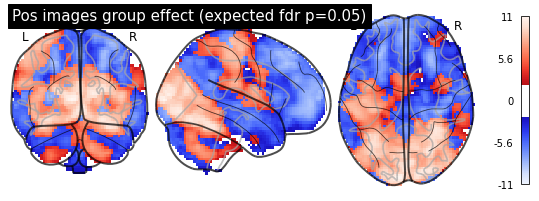

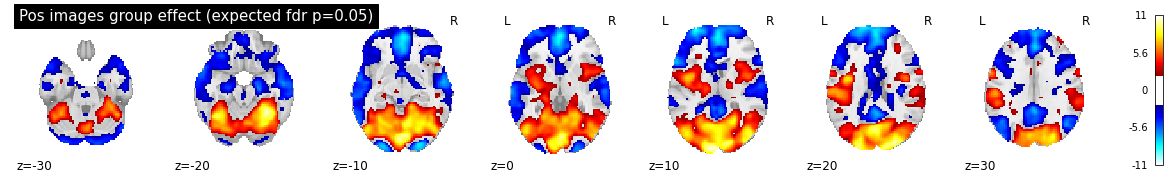

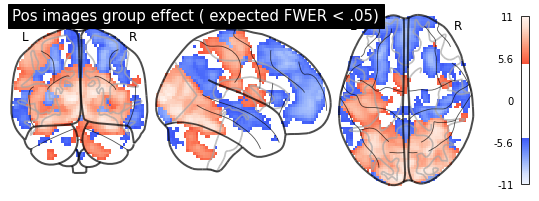

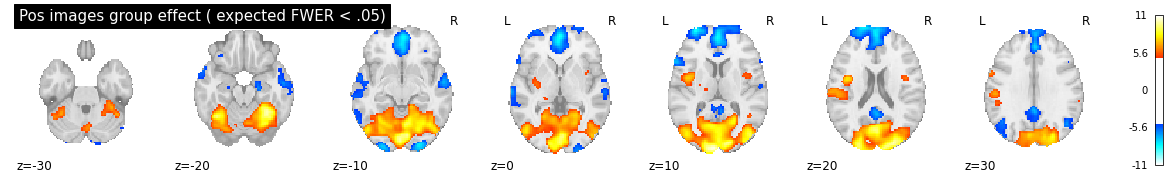

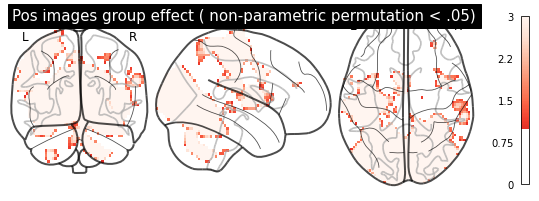

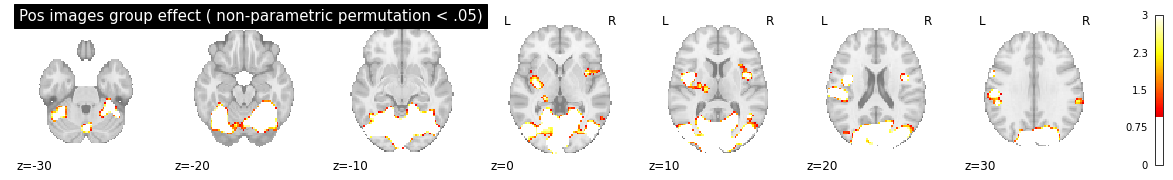

In [96]:
from nilearn.glm import threshold_stats_img

#FDR-correction with alpha=0.05
thresholded_map2, threshold2 = threshold_stats_img(
    zmap_g, alpha=.05, height_control='fdr')
print('The FDR=.05 threshold is %.3g' % threshold2)

#Bonferonni-correction wtih alpha=0.05 
thresholded_map3, threshold3 = threshold_stats_img(
    zmap_g, alpha=.05, height_control='bonferroni')
print('The p<.05 Bonferroni-corrected threshold is %.3g' % threshold3)

#Non-parametric permutation 
from second_level import non_parametric_inference_linesEdit #Import function from local script ("second_level.py") - I had to edit a bug in there in order to use this function with first-level model objects as input to second_level_input argument

n_perm=1000
design_matrix = pd.DataFrame(
    [1] * len(second_level_input),
    columns=['intercept'],
)

out_dict = non_parametric_inference_linesEdit(
    second_level_input,
    design_matrix=design_matrix,
    #first_level_contrast='image_neg-image_pos',
    model_intercept=True,
    n_perm=n_perm,  
    two_sided_test=False,
    smoothing_fwhm=8.0,
    n_jobs=1,
)

#Plot fdr-corrected image 
plotting.plot_glass_brain(thresholded_map2, cmap='blue_red',colorbar=True, threshold=threshold2,
                          title='Pos images group effect (expected fdr p=0.05)',
                          plot_abs=False)
plt.show()

plot_stat_map(thresholded_map2, cmap='cold_hot', threshold=threshold2,cut_coords=[-30,-20,-10,0,10,20,30],
              display_mode='z',  black_bg=False,
              title='Pos images group effect (expected fdr p=0.05)')
plt.show()

#Plot bonferroni correction (FWER)
plotting.plot_glass_brain(thresholded_map3, cmap='blue_red',colorbar=True, threshold=threshold3,
                          title='Pos images group effect ( expected FWER < .05)',
                          plot_abs=False)
plt.show()

plot_stat_map(thresholded_map3, cmap='cold_hot', threshold=threshold3,cut_coords=[-30,-20,-10,0,10,20,30],
              display_mode='z',  black_bg=False,
              title='Pos images group effect ( expected FWER < .05)')
plt.show()

#Plot non-parametric permutation map 
import numpy as np
threshold_log = round(-np.log10(1 / 20))  # p < 0.05 - taking into account that our stat values are now on the negative log (happens in permutation) 
vmax = round(-np.log10(1 / n_perm)) # minimal p-value possible with the number of permuations
plotting.plot_glass_brain(out_dict, cmap='blue_red',colorbar=True, threshold=threshold_log, vmax=vmax,
                          title='Pos images group effect ( non-parametric permutation < .05)',
                          plot_abs=False)
plt.show()

plot_stat_map(out_dict, cmap='cold_hot', threshold=threshold_log,cut_coords=[-30,-20,-10,0,10,20,30],
              display_mode='z',  black_bg=False,
              title='Pos images group effect ( non-parametric permutation < .05)')
plt.show()


In [ ]:
##atlas reader doing atlas reader thing

In [187]:
os.getcwd()

'/work/neuro_data'

In [ ]:
#finding clusters, setting the cluster extent to 5 voxels

In [89]:
os.system("pip install atlasreader")
from atlasreader import create_output

output_dir = "glm_results_neg/"

# Step 3: Create output 
create_output(
    filename = out_dict,
    atlas='default',
    #voxel_thresh=1.96,
    voxel_thresh=threshold_log,
    direction='both',
    cluster_extent=5,
    glass_plot_kws = {'black_bg':True,'vmax':20,'colorbar':True, 'cmap': 'jet'},
    stat_plot_kws = {'black_bg':True,'cmap': 'jet','title':False},
    outdir=output_dir
    )

In [ ]:
#looking at the output of the atlas clusters

In [90]:
peak_info_emo_baseline = pd.read_csv(os.path.join(output_dir, 'atlasreader_peaks.csv'))
display(peak_info_emo_baseline)

cluster_info_emo_baseline = pd.read_csv(os.path.join(output_dir, 'atlasreader_clusters.csv'))
display(cluster_info_emo_baseline)

,cluster_id,peak_x,peak_y,peak_z,peak_value,volume_mm,aal,desikan_killiany,harvard_oxford
0,1,2.014,-76.928,-2.50,3.00043,205436.000,Lingual_R,ctx-rh-lingual,60.0% Right_Lingual_Gyrus; 16.0% Left_Lingual_...
1,2,-45.980,-28.934,49.18,3.00043,42033.900,Postcentral_L,ctx-lh-postcentral,42.0% Left_Postcentral_Gyrus; 11.0% Left_Supra...
2,3,-40.928,-3.674,9.66,3.00043,10028.400,Insula_L,Unknown,49.0% Left_Insular_Cortex; 28.0% Left_Central_...
3,4,-5.564,-1.148,43.10,3.00043,6459.290,Cingulate_Mid_L,Unknown,43.0% Left_Cingulate_Gyrus_anterior_division; ...
4,5,39.904,1.378,12.70,2.69940,4732.930,Insula_R,Unknown,58.0% Right_Central_Opercular_Cortex; 20.0% Ri...
5,6,62.638,-36.512,24.86,3.00043,2250.080,SupraMarginal_R,Right-Cerebral-White-Matter,36.0% Right_Supramarginal_Gyrus_posterior_divi...
6,7,-18.194,-16.304,3.58,3.00043,2114.300,Thalamus_L,Left-Thalamus-Proper,31.0% Left_Thalamus
7,8,-63.662,6.430,27.90,3.00043,950.465,no_label,Unknown,0% no_label
8,9,-33.350,-54.194,-57.22,2.30146,872.876,Cerebelum_8_L,Left-Cerebellum-Cortex,0% no_label
9,10,60.112,-56.720,3.58,2.69940,834.082,Temporal_Mid_R,ctx-rh-middletemporal,70.0% Right_Middle_Temporal_Gyrus_temporooccip...


,cluster_id,peak_x,peak_y,peak_z,cluster_mean,volume_mm,aal,desikan_killiany,harvard_oxford
0,1,2.014,-76.928,-2.50,2.75109,205436.000,8.65% no_label; 7.69% Calcarine_L; 7.42% Occip...,19.32% Unknown; 16.41% Right-Cerebral-White-Ma...,10.60% no_label; 9.69% Left_Occipital_Pole; 7....
1,2,-45.980,-28.934,49.18,2.59474,42033.900,33.46% Postcentral_L; 18.04% Precentral_L; 13....,34.98% Left-Cerebral-White-Matter; 30.60% Unkn...,41.62% Left_Postcentral_Gyrus; 19.29% Left_Pre...
2,3,-40.928,-3.674,9.66,2.20056,10028.400,37.14% Insula_L; 21.47% Putamen_L; 21.47% Rola...,29.79% Left-Cerebral-White-Matter; 25.53% Left...,33.27% Left_Central_Opercular_Cortex; 29.79% L...
3,4,-5.564,-1.148,43.10,2.34410,6459.290,42.04% Cingulate_Mid_L; 27.63% Supp_Motor_Area...,52.85% Unknown; 17.72% Left-Cerebral-White-Mat...,39.94% Left_Juxtapositional_Lobule_Cortex_(for...
4,5,39.904,1.378,12.70,1.82678,4732.930,47.13% Insula_R; 19.67% no_label; 16.80% Rolan...,37.70% Right-Cerebral-White-Matter; 27.46% Unk...,39.75% Right_Central_Opercular_Cortex; 38.11% ...
5,6,62.638,-36.512,24.86,2.03910,2250.080,80.17% SupraMarginal_R; 17.24% Temporal_Sup_R,52.59% ctx-rh-supramarginal; 25.00% Unknown; 2...,51.72% Right_Supramarginal_Gyrus_posterior_div...
6,7,-18.194,-16.304,3.58,1.97110,2114.300,81.65% Thalamus_L; 18.35% no_label,73.39% Left-Thalamus-Proper; 19.27% Left-Cereb...,88.99% Left_Thalamus; 6.42% no_label
7,8,-63.662,6.430,27.90,2.05297,950.465,65.31% Precentral_L; 34.69% no_label,55.10% Unknown; 32.65% ctx-lh-precentral; 12.2...,93.88% Left_Precentral_Gyrus; 6.12% no_label
8,9,-33.350,-54.194,-57.22,1.56016,872.876,100.00% Cerebelum_8_L,97.78% Left-Cerebellum-Cortex,100.00% no_label
9,10,60.112,-56.720,3.58,1.54256,834.082,95.35% Temporal_Mid_R,41.86% ctx-rh-middletemporal; 37.21% Right-Cer...,100.00% Right_Middle_Temporal_Gyrus_temporoocc...
